### 0. Environment Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os 
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# set gpu
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# set the random seed
seed = 0
torch.manual_seed(seed)
np.random.seed(seed)

### 1. Loading Our Model

In [5]:
# from data_gen import 
from models.model_log_sig import RecSpectrometer

model = RecSpectrometer(num_sensors=16, num_wavelengths=301)

PATH = "./saved_models/model_log_pk205_sig_iter20000.pth"
model.load_state_dict(torch.load(PATH))

# print(model)

<All keys matched successfully>

### 2. Testing on Real Data

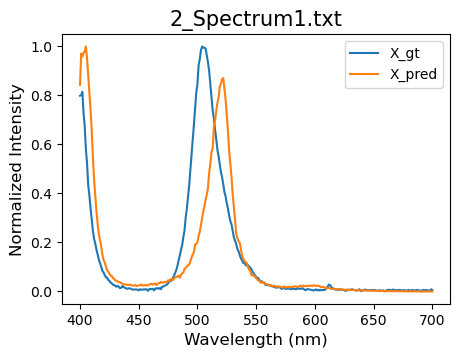

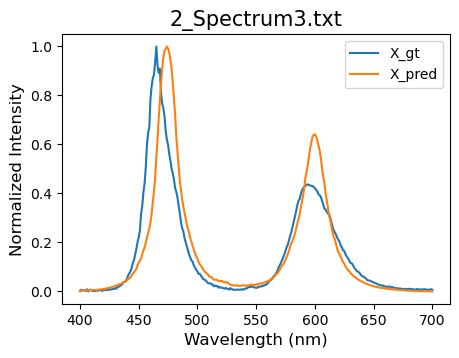

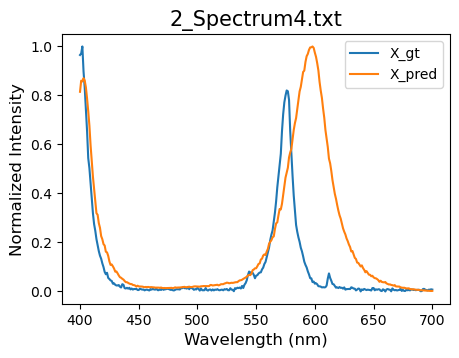

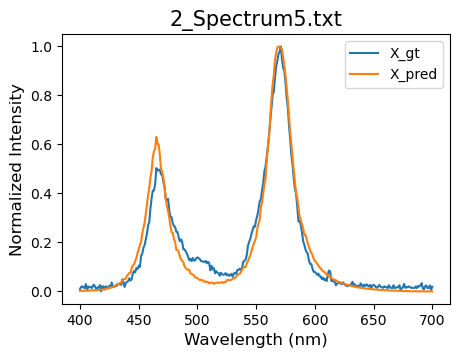

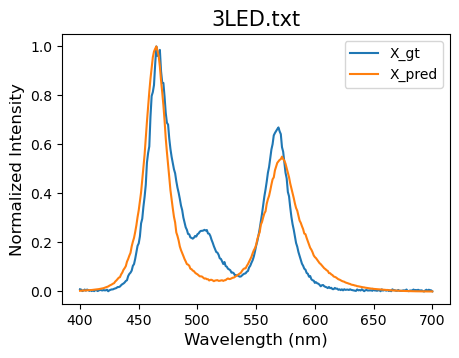

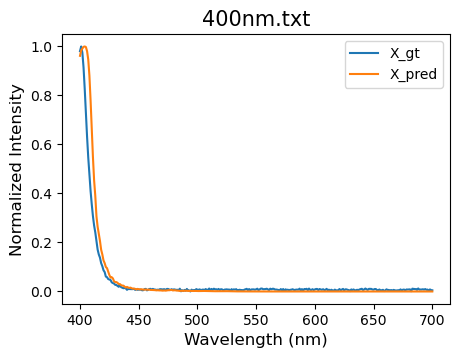

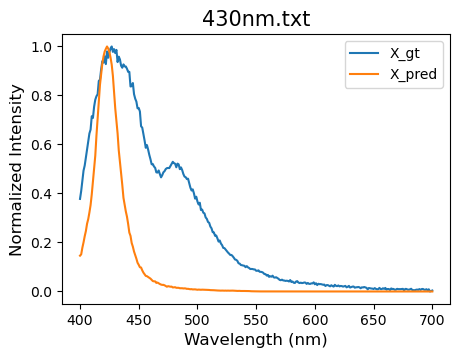

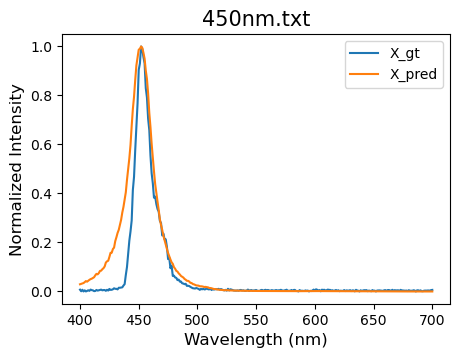

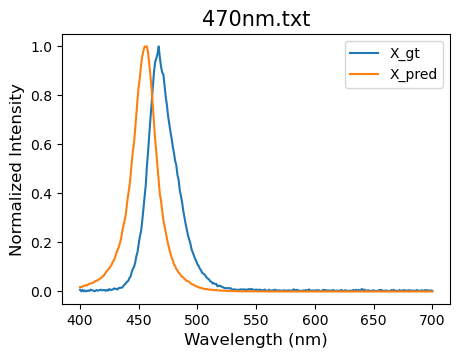

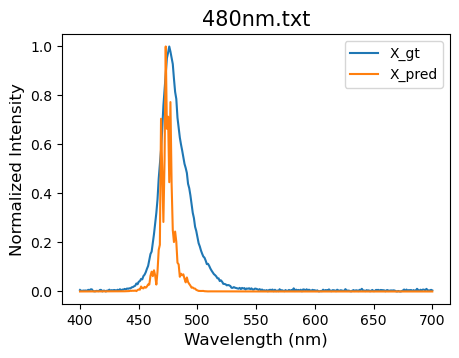

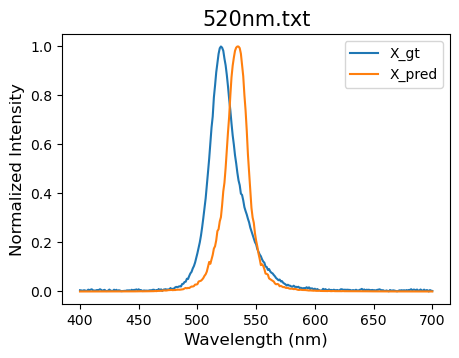

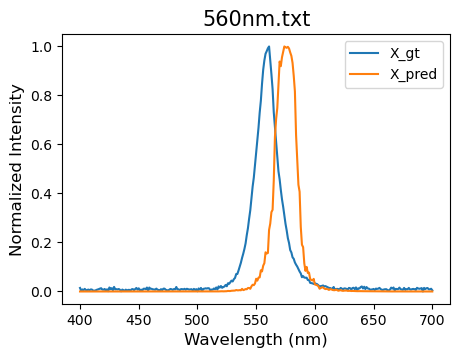

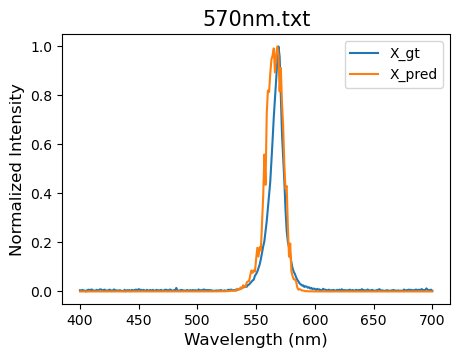

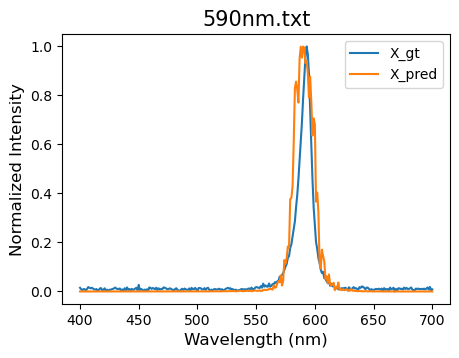

In [17]:
from utils import normalize_y, log_min_max_mapping
nmlz_func = log_min_max_mapping


from utils import load_real_dataset
directory_path = './data/real_data_1/Spec'
file_names = os.listdir(directory_path)
# for i, name in enumerate(file_names):
#     print(i, name)
real_y_batch, real_X_batch = load_real_dataset(data_file_list=file_names,
                                               Ip_dir="./data/real_data_1/Ip/", 
                                               Spec_dir="./data/real_data_1/Spec/")

# fig, axs = plt.subplots(5, 3, figsize=(15, 10))

%matplotlib inline
for idx in range(real_y_batch.size()[0]-1):
    fname = file_names[idx]
    real_y = real_y_batch[idx,:].reshape(1,-1)
    X_gt_real = real_X_batch[idx, :].reshape(-1)

    with torch.no_grad():
        model.eval()
        model.cpu()
        input_y = normalize_y(real_y, func=nmlz_func)
        # input_y = input_y[:,-num_d:]
        X_pred = model(input_y).numpy().reshape(-1)
        X_pred /= np.max(X_pred)

        X_pred_pp = np.clip(X_pred, a_min=0, a_max=1)

    # arrange the subplots
    # row, col = idx % 5, idx // 5

    plt.figure(figsize=(5, 3.5))
    plt.plot(X_gt_real, label="X_gt")
    # plt.plot(X_pred, label="X_pred")
    plt.plot(X_pred_pp, label="X_pred")

    plt.legend()
    plt.xticks(list(range(0, 301, 50)), np.arange(400, 701, 50))
    plt.yticks(np.linspace(0, 1, 6))
    plt.xlabel("Wavelength (nm)", size=12)
    plt.ylabel("Normalized Intensity", size=12)
    # plt.title(f"{fname} \n (w/o Peak Finder, New, cut-off)", size=15)
    plt.title(f"{fname}", size=15)
    plt.show()